In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings('ignore')
# warnings.filterwarnings(action='ignore', category=DataConversionWarning)
# warnings.filterwarnings(action='ignore', category=DeprecationWarning)
red = pd.read_csv("winequality-red.csv")

In [2]:
X = red.iloc[:,:-1]
y = red.iloc[:,[-1]]
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [3]:
y.head()

,quality
0,5
1,5
2,5
3,6
4,5


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [5]:
X_train[:5]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
493,8.7,0.690,0.31,3.0,0.086,23.0,81.0,1.00020,3.48,0.74,11.6
354,6.1,0.210,0.40,1.4,0.066,40.5,165.0,0.99120,3.25,0.59,11.9
342,10.9,0.390,0.47,1.8,0.118,6.0,14.0,0.99820,3.30,0.75,9.8
834,8.8,0.685,0.26,1.6,0.088,16.0,23.0,0.99694,3.32,0.47,9.4
705,8.4,1.035,0.15,6.0,0.073,11.0,54.0,0.99900,3.37,0.49,9.9


In [6]:
print('X_train 크기 :', X_train.shape)
print('X_test 크기 :', X_test.shape)

X_train 크기 : (1279, 11)
X_test 크기 : (320, 11)


In [7]:
print('y_train 크기 :', y_train.shape)
print('y_test 크기 :', y_test.shape)

y_train 크기 : (1279, 1)
y_test 크기 : (320, 1)


In [8]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train, y_train)

pre = knn.predict(X_test) 
print(f'테스트 세트의 정확도 : {knn.score(X_test, y_test):.2f}')
print(f'pre :\n{pre[:10]}')
print(f'y   :\n{y_test["quality"].values[:10]}')

테스트 세트의 정확도 : 0.51
pre :
[5 5 6 6 6 5 5 5 6 5]
y   :
[6 5 6 5 6 5 5 5 5 6]


In [9]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn, X, y)
print(scores)
print('교차검증 평균점수 : {:.2f}'.format(scores.mean()))

[0.4728972  0.44090056 0.40301318]
교차검증 평균점수 : 0.44


In [10]:
from sklearn.model_selection import cross_validate
res = cross_validate(knn, X, y, return_train_score=True)
res_df = pd.DataFrame(res)
display(res_df)
print('평균 시간과 점수 : \n', res_df.mean())

,fit_time,score_time,test_score,train_score
0,0.002996,0.013003,0.472897,1.0
1,0.003003,0.010802,0.440901,1.0
2,0.000000,0.015625,0.403013,1.0


평균 시간과 점수 : 
 fit_time       0.002000
score_time     0.013143
test_score     0.438937
train_score    1.000000
dtype: float64


### 스케일러

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train_scaled, y_train)

pre = knn.predict(X_test_scaled) 
print(f'테스트 세트의 정확도 : {knn.score(X_test_scaled, y_test):.2f}')
print(f'pre :\n{pre[:10]}')
print(f'y   :\n{y_test["quality"].values[:10]}')

테스트 세트의 정확도 : 0.62
pre :
[5 5 6 5 6 5 5 5 7 6]
y   :
[6 5 6 5 6 5 5 5 5 6]


In [12]:
X_train[:3]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
493,8.7,0.69,0.31,3.0,0.086,23.0,81.0,1.0002,3.48,0.74,11.6
354,6.1,0.21,0.40,1.4,0.066,40.5,165.0,0.9912,3.25,0.59,11.9
342,10.9,0.39,0.47,1.8,0.118,6.0,14.0,0.9982,3.30,0.75,9.8


In [13]:
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler().fit(X_train)
X_train_scaled = robust_scaler.transform(X_train)
X_test_scaled = robust_scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train_scaled, y_train)

pre = knn.predict(X_test_scaled) 
print(f'테스트 세트의 정확도 : {knn.score(X_test_scaled, y_test):.2f}')
print(f'pre :\n{pre[:10]}')
print(f'y   :\n{y_test["quality"].values[:10]}')

테스트 세트의 정확도 : 0.62
pre :
[6 5 6 6 6 5 5 5 6 6]
y   :
[6 5 6 5 6 5 5 5 5 6]


In [14]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = minmax_scaler.transform(X_train)
X_test_scaled = minmax_scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train_scaled, y_train)

pre = knn.predict(X_test_scaled) 
print(f'테스트 세트의 정확도 : {knn.score(X_test_scaled, y_test):.2f}')
print(f'pre :\n{pre[:10]}')
print(f'y   :\n{y_test["quality"].values[:10]}')

테스트 세트의 정확도 : 0.62
pre :
[5 5 6 5 6 5 5 5 7 6]
y   :
[6 5 6 5 6 5 5 5 5 6]


In [15]:
from sklearn.preprocessing import MaxAbsScaler

maxabs_scaler = MaxAbsScaler().fit(X_train)
X_train_scaled = maxabs_scaler.transform(X_train)
X_test_scaled = maxabs_scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train_scaled, y_train)

pre = knn.predict(X_test_scaled) 
print(f'테스트 세트의 정확도 : {knn.score(X_test_scaled, y_test):.2f}')
print(f'pre :\n{pre[:10]}')
print(f'y   :\n{y_test["quality"].values[:10]}')

테스트 세트의 정확도 : 0.60
pre :
[5 5 6 5 6 5 5 5 6 6]
y   :
[6 5 6 5 6 5 5 5 5 6]


In [16]:
from sklearn.preprocessing import Normalizer

normal_scaler = Normalizer().fit(X_train)
X_train_scaled = normal_scaler.transform(X_train)
X_test_scaled = normal_scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train_scaled, y_train)

pre = knn.predict(X_test_scaled) 
print(f'테스트 세트의 정확도 : {knn.score(X_test_scaled, y_test):.2f}')
print(f'pre :\n{pre[:10]}')
print(f'y   :\n{y_test["quality"].values[:10]}')

테스트 세트의 정확도 : 0.55
pre :
[5 5 6 6 6 5 5 5 6 6]
y   :
[6 5 6 5 6 5 5 5 5 6]


**standard 사용**

In [17]:
X = red.iloc[:,:-1]
y = red.iloc[:,[-1]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train_scaled, y_train)

pre = knn.predict(X_test_scaled) 
print(f'테스트 세트의 정확도 : {knn.score(X_test_scaled, y_test):.2f}')
print(f'pre :\n{pre[:10]}')
print(f'y   :\n{y_test["quality"].values[:10]}')

테스트 세트의 정확도 : 0.62
pre :
[5 5 6 5 6 5 5 5 7 6]
y   :
[6 5 6 5 6 5 5 5 5 6]


In [18]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(knn, random_state=42).fit(X_test_scaled, y_test)
eli5.show_weights(perm, feature_names = X.columns.tolist())

Using TensorFlow backend.


Weight,Feature
0.1075 ± 0.0382,alcohol
0.0756 ± 0.0346,pH
0.0675 ± 0.0557,volatile acidity
0.0619 ± 0.0254,sulphates
0.0594 ± 0.0331,citric acid
0.0531 ± 0.0259,free sulfur dioxide
0.0494 ± 0.0541,density
0.0469 ± 0.0435,total sulfur dioxide
0.0362 ± 0.0255,residual sugar
0.0362 ± 0.0287,fixed acidity


**eli5 => 매번 달라짐**

#### n_neighbors = 1 선정 이유

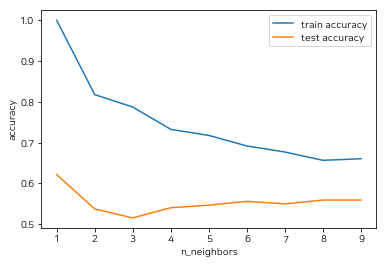

In [19]:
training_accuracy = []
test_accuracy = []
# 1에서 10까지 n_neighbors를 적용
neighbors_settings = range(1, 10)

for n_neighbors in neighbors_settings:
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train_scaled, y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train_scaled, y_train))
    # 일반화 정확도 저장
    test_accuracy.append(clf.score(X_test_scaled, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="train accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [20]:
# 정규화, 스케일링
data = pd.read_csv('binary_class_scaled.csv')
X = data.drop(['quality'], axis=1)
y = data['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train, y_train)

pre = knn.predict(X_test) 
print(f'테스트 세트의 정확도 : {knn.score(X_test, y_test):.4f}')
print(f'pre :\n{pre[:10]}')
print(f'y   :\n{y_test.values[:10]}')

테스트 세트의 정확도 : 0.7489
pre :
[1 0 0 0 1 1 1 0 0 1]
y   :
[1 1 0 0 1 1 1 0 0 1]


In [21]:
perm = PermutationImportance(knn, random_state=42).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X.columns.tolist())

Weight,Feature
0.0837 ± 0.0374,residual sugar
0.0837 ± 0.0185,alcohol
0.0546 ± 0.0392,sulphates
0.0546 ± 0.0494,chlorides
0.0537 ± 0.0359,fixed acidity
0.0467 ± 0.0346,volatile acidity
0.0405 ± 0.0196,free sulfur dioxide
0.0370 ± 0.0205,total sulfur dioxide
0.0370 ± 0.0359,pH
0.0335 ± 0.0396,density


**모든 속성을 사용**

In [22]:
# 이 코드는 실행 안해도 됨

# tmp = eli5.explain_weights_df(perm)

# # 중요하지 않은 것들 제거
# important_cols = tmp[tmp['weight']>0.01]['feature'].map(lambda x: 
#                                                         int(x.replace('x', ''))).values
# important_cols = red.columns[important_cols].values

# X = red[important_cols]
# # X = X.drop(['chlorides', 'residual sugar'], axis=1)
# y = red['quality']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

# scaler = StandardScaler().fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# knn = KNeighborsClassifier(n_neighbors=1)

# knn.fit(X_train_scaled, y_train)

# pre = knn.predict(X_test_scaled) 
# print(f'테스트 세트의 정확도 : {knn.score(X_test_scaled, y_test):.2f}')
# print(f'pre :\n{pre[:10]}')
# print(f'y   :\n{y_test.values[:10]}')

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['feature'] = X.columns
vif.round(1)

,VIF Factor,feature
0,6.8,fixed acidity
1,2.1,volatile acidity
2,3.1,citric acid
3,1.7,residual sugar
4,1.3,chlorides
5,1.9,free sulfur dioxide
6,2.1,total sulfur dioxide
7,6.4,density
8,3.1,pH
9,1.3,sulphates


In [24]:
X = X.drop(['fixed acidity'], axis=1)
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['feature'] = X.columns
vif.round(1)

,VIF Factor,feature
0,2.1,volatile acidity
1,2.9,citric acid
2,1.6,residual sugar
3,1.3,chlorides
4,1.9,free sulfur dioxide
5,2.1,total sulfur dioxide
6,2.9,density
7,1.4,pH
8,1.3,sulphates
9,2.6,alcohol


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train, y_train)

pre = knn.predict(X_test) 
print(f'테스트 세트의 정확도 : {knn.score(X_test, y_test):.4f}')
print(f'pre :\n{pre[:10]}')
print(f'y   :\n{y_test.values[:10]}')

테스트 세트의 정확도 : 0.7709
pre :
[1 0 0 0 1 1 1 0 0 1]
y   :
[1 1 0 0 1 1 1 0 0 1]


In [26]:
knn = KNeighborsClassifier(weights='distance', n_neighbors=1)

knn.fit(X_train, y_train)

pre = knn.predict(X_test) 
print(f'테스트 세트의 정확도 : {knn.score(X_train, y_train):.4f}')
print(f'테스트 세트의 정확도 : {knn.score(X_test, y_test):.4f}')
print(f'pre :\n{pre[:10]}')
print(f'y   :\n{y_test.values[:10]}')

테스트 세트의 정확도 : 1.0000
테스트 세트의 정확도 : 0.7709
pre :
[1 0 0 0 1 1 1 0 0 1]
y   :
[1 1 0 0 1 1 1 0 0 1]


In [27]:
from math import sqrt
from sklearn.metrics import mean_squared_error

# train data의 RMSE score
print(sqrt(mean_squared_error(y_test, pre)))

0.47861768653889236
